# Video using Webcam

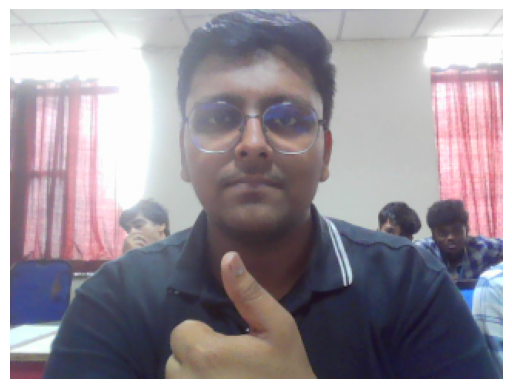

In [5]:
import cv2
import matplotlib.pyplot as plt

# Initialize video capture object
cap = cv2.VideoCapture(0)

# Define the image size scaling factor
scaling_factor = 0.5

# Loop until you hit the Esc key
while True:
    # Capture the current frame
    ret, frame = cap.read()

    if not ret:
      print("Cam not accessible")
      break

    # Resize the frame
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

    # Display the image
    cv2.imshow('Webcam', frame)

    # Detect if the Esc key has been pressed
    c = cv2.waitKey(1)
    if c == 27:
        plt.axis('off')
        plt.imshow(frame[:, :, ::-1])
        break

# Release the video capture object
cap.release()

# Close all active windows
cv2.destroyAllWindows()

# Haarcascade face detector

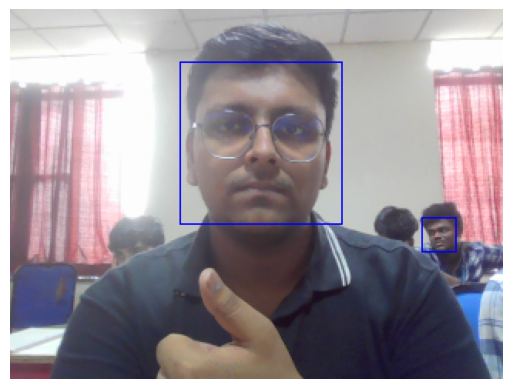

In [6]:
import cv2
from cv2.data import haarcascades
import numpy as np

# Load the face cascade file
face_cascade = cv2.CascadeClassifier(haarcascades + 'haarcascade_frontalface_alt.xml')

# Check if the face cascade file has been loaded
if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')

# Initialize the video capture object
cap = cv2.VideoCapture(0)

# Define the scaling factor
scaling_factor = 0.5

# Loop until you hit the Esc key
while True:
    # Capture the current frame and resize it
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Run the face detector on the grayscale image
    face_rects = face_cascade.detectMultiScale(gray, 1.1, 3)

    # Draw rectangles on the image
    for (x, y, w, h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 1)

    # Display the image
    cv2.imshow('Face Detector', frame)

    # Check if Esc key has been pressed
    c = cv2.waitKey(1)
    if c == 27:
        plt.axis('off')
        plt.imshow(frame[:, :, ::-1])
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()